##Assignment 8: Final project Estimating the time and height to the apogee of a rocket using joint assimilation  of barometer and accelerometer of lower and higher accuracy.  Linear Kalman filter.


###Team 8

*   Javier Peñuela
*   Divine Okeke
*   Olga Shalopanova

Skoltech, 2022


The  objectives  of  this  assignment  are  to  encourage  you  to  think  creatively  and  critically  to extract  a  useful  signal from noisy  experimental  data,  find  best  estimation  method  of  a  dynamical
process and make forecast of its future development.  
  

Formulation

1. Determine the time and height at which a rocket reaches the apogee using barometer and accelerometer measurements.  

2.  There are following measurements for your availability  
- ‘z.txt’  Measurements of position 𝑠 by barometer and acceleration 𝑎 by the accelerometer.

Format  

First column - measurements of position 𝑠 by barometer.  

Second column - measurements of acceleration 𝑎 by the accelerometer.

- File ‘time.txt’ indicates the time of measurements in seconds.

- ‘z_acc.txt’ Measurements of position 𝑠 by another barometer and acceleration 𝑎 with a higher accuracy. However these  measurements are available with gaps  (step 1 – no measurements, step 2 – measurements are available, step 3 – no measurements, step 4 – measurements are available, and so on).  Format is the same as above.
  


We start importing, preprocessing and visualising the data.

In [ ]:
#importing basic libraries
import numpy as np # library for linear algebra
import pandas as pd # library for  data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # library for ploting
import math

#style configuration for plots
plt.rcParams["figure.figsize"] = (15,10) #select plots size
plt.style.use('seaborn-whitegrid')#select plots graphycal style

In [ ]:
#use loaded to google drive dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the data set as a dataframe
colnames=['s', 'a']  #define column names
z = pd.read_csv("z.txt",delim_whitespace=True, names=colnames) #load dataset
z_acc = pd.read_csv("z_acc.txt",delim_whitespace=True, names=colnames) #load dataset
time = pd.read_csv("time.txt",delim_whitespace=True, names=["Time"]) #load dataset

In [ ]:
z

,s,a
0,-10.303187,159.940157
1,13.462743,160.089745
2,7.117249,160.179773
3,23.781351,159.999702
4,8.556273,160.049552
...,...,...
283,35.087614,-10.128147
284,25.860651,-9.835795
285,18.629188,-9.776024
286,7.392244,-9.802733


In [ ]:
z.set_index(time["Time"],inplace=True)
z_acc.set_index(time["Time"],inplace=True)
z_acc_no_gaps=z_acc["s"].dropna()

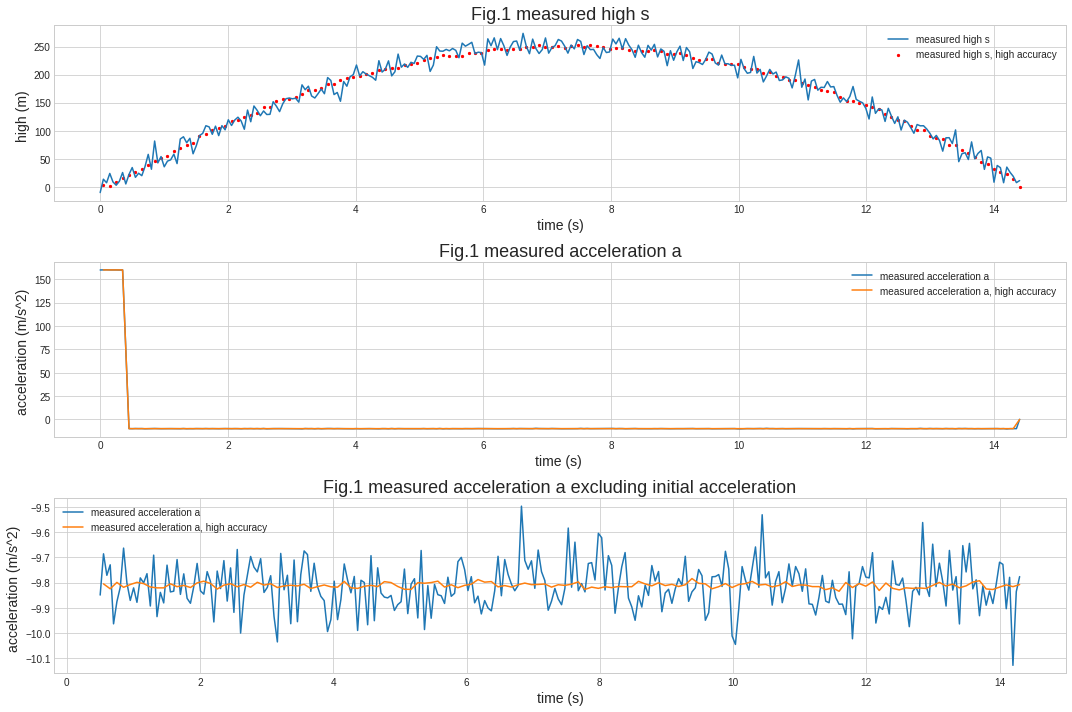

In [ ]:
plt.subplot(3,1,1)
plt.plot(z["s"], label="measured high s") # plot the measurements
plt.scatter(z_acc_no_gaps.index,z_acc_no_gaps, label="measured high s, high accuracy",color="red",s=5) # plot the trajectory
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('high (m) ',fontsize=14)
plt.title('Fig.1 measured high s', fontsize=18)
plt.legend()
plt.subplot(3,1,2)
plt.plot(z["a"], label="measured acceleration a") # plot the measurements
plt.plot(z_acc["a"].dropna(), label="measured acceleration a, high accuracy") # plot the trajectory
plt.xlabel('time (s) ',fontsize=14)
plt.ylabel('acceleration (m/s^2) ',fontsize=14)
plt.title('Fig.1 measured acceleration a', fontsize=18)
plt.legend()
plt.subplot(3,1,3)
plt.plot(z["a"][0.5:14.3], label="measured acceleration a") # plot the measurements
plt.plot(z_acc["a"][0.5:14.3].dropna(), label="measured acceleration a, high accuracy") # plot the trajectory
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('acceleration (m/s^2) ',fontsize=14)
plt.title('Fig.1 measured acceleration a excluding initial acceleration', fontsize=18)
plt.tight_layout()
plt.legend()
plt.show()


*Analysis:* The high measurement with lower accuracy is significantly noisier than the measurements with high accuracy. For acceleration the initial values are related to the initial acceleration of the rocket but later the rockets acceleration is close to the gravitational falling in vacuum. Most likely we can integrate them different acceleration measurements in a creative way as they hold no significant changes overtime.

- Construct the Linear Kalman filter that uses a data set ‘z.txt’.

- Develop optimal smoothing based on obtained filtered results.

Useful hints:


(a)  State vector $$𝑋_𝑖 =\left|\begin{array}{l}
𝑠_𝑖\\
𝑉_𝑖\\
𝑎_𝑖\\
\end{array}\right| $$
Here $𝑠$ is the position of the rocket, $𝑉_𝑖$ – velocity, $𝑎_𝑖$ – acceleration.

The state of a rocket at step $𝑖$ is represented by the following state equation
$$
𝑋_{𝑖+1} =Φ_{𝑖+1,𝑖}𝑋_𝑖 $$

Here transition matrix
$$
Φ_{𝑖+1,𝑖} =\left|\begin{array}{l}1 & Δ𝑡 &Δ𝑡^2/2\\
0 &1 &Δ𝑡\\
0& 0& 1
\end{array}\right| $$
$Δ𝑡$ – time step between measurements.

From a prior information you know that the covariance matrix of state noise is given by

$$
𝑄 =\left|\begin{array}{l}
1 &0 &0\\
0 &1 &0\\
0 &0 &1\\
\end{array}\right|$$

(b)  Measurement vector consists of position $𝑠$ by barometer and acceleration $𝑎$ by the accelerometer
$$𝑧_𝑖 =\left|\begin{array}{l}𝑠_𝑖^𝑚\\
𝑎_𝑖^𝑚\end{array}\right|$$
From a prior information we know that the variance of measurement noise for position $𝑠$  is $𝜎_𝑠^2 =12^2,𝜎_𝑎^2 =0.09^2$.  Covariance matrix of measurement noise $𝑅$ thus consists of diagonal elements of these variances. Corresponding observation matrix $𝐻$.
 $$
𝐻 =\left|\begin{array}{l}1 &0& 0\\
0& 0& 1\end{array}\right|$$

Construct a linear forward filter and backward smoothing assimilating these measurements Make plots of measurements, filtration and smoothing. Determine time and height to apogee based on the estimation results.  Calculate estimation errors over the whole estimation interval as well at the time when apogee is reached according to estimations.

In [ ]:
def state_vector(Z,time):
  """
  takes a pandas datafram with the data and generates a state vector
  """
  time=time.to_numpy()
  Z=Z.to_numpy()
  X = np.zeros((len(time), 3, 1)) # generate a N*N matrix for X
  T=time[1]-time[0]
  X[0,0] = Z[0,0] # assign S0 to the first row of sx
  X[0,1] = 0 # assign v0
  X[0,2] = Z[0,1] # assign a0
  for i in range(1,len(time)):
    X[i,0] = Z[i,0] # assign Si to the first row of sx
    X[i,1] = X[i-1,1]+X[i-1,2]*T # aproximate vi
    X[i,2] = Z[i,1] # assign ai
  return X

def initial_P(N,size, diagonal_value):
  P = np.zeros((N, size, size))#create a matrix filled with zeros
  np.fill_diagonal(P[0],diagonal_value)#fill the diagonal of the first time step with an aproximated error
  return P

def measurements(Z):
  Z=Z.to_numpy()
  z = np.zeros((len(Z[:,0]), 2, 1))
  for i in range(len(Z[:,0])):
    z[i] = np.matrix([[Z[i,0]], [Z[i,1]]])
  return z

In [ ]:
def Kalman(N, Phi, X_init, Q, P,H, z, m, K_steady=-1):
  """
  Inputs:
  N: size
  Phi: transition matrix
  X: State Vector
  Q: Covariance matrix
  P: Filtration error covariance matrix
  z: measurements
  m: steps
  K_steady: determine the constant value of kalman filter gain
  polar: return adicionally the dataset in polar coordinates
  Outputs:
  X: Estimation results(before m-step extrapolation)
  X_step: Estimation results(after m-step extrapolation)
  P: Filtration error covariance matrix
  K: Filter gain, weight of residual
  """
  # Initialize X
  X = X_init.copy()
  # Initialize X_step
  X_step = np.zeros((N, X.shape[1], 1))
  P_ext=P.copy()
  # Create a matrix for K
  K = np.zeros((N, X.shape[1], R.shape[1]))

  # Kalman filter algorithm
  for i in range(1, N):
  # Prediction(extrapolation)
    X[i] = Phi @ X[i-1] # by function (13)
    P[i] = (Phi @ P[i-1] @ Phi.T) + Q # by function (14)
    P_ext[i]=P[i]
    # Filtration

    K[i] = P[i] @ H.T @ np.linalg.inv(H @ P[i] @ H.T + R) # by function (17)

    X[i] = X[i] + K[i] @(z[i] - H @ X[i]) # by function (16)
    P[i] = (np.identity(len(P[0])) - K[i] @ H) @ P[i] # by function (18)

  # m-step extrapolation
  X_step[0:m] = X[0:m]
  for i in range(m, N-m+1):
    # for i in range(1, N):
    Phi_m = np.linalg.matrix_power(Phi, m-1) # calculate the new Phi regarding the step m
    X_step[i+m-1] = Phi_m @ X[i]
  return X, X_step, P,P_ext, K

def Kalman_backward_smoothing( X,P_filt,P_pred,Phi):
#Initiallization
  X_smooth=X.copy()
  X_smooth[-1]=X[-1]
  X_filt = X.copy()
  P_smooth=P_filt.copy()
  P_smooth[-1]=P_filt[-1]
  Phi_T = np.transpose(Phi)
  A = P_filt.copy()

  #Prediction of state vector at time 𝒊using 𝒊−𝟏measurements
  for i in range(2, len(X[:,0])):
    A[-i] =P_filt[-i] @ Phi_T @ np.linalg.inv(P_pred[-i])
    X_smooth[-i] =X_filt[-i] + A[-i] @ (X_smooth[-i+1] - Phi @ X_filt[-i])
  #Prediction error covariance matrix
    P_smooth[-i] = P_filt[-i]+ A[-i] @(P_smooth[-i+1] - P_pred[-i])@A[-i].T
  return X_smooth,P_smooth, A

In [ ]:
sigma_s=12**2#variance of measurement noise of high
sigma_a=0.09**2#variance of measurement noise of acceleration
DT=time["Time"][1]-time["Time"][0] # size of time step
Phi = np.matrix([[1, DT,(DT**2)/2], [0, 1,DT],[ 0,0,1]])# matrix phy
H = np.matrix([[1,0,0],[0,0,1]])# matrix H
Q=np.eye(len(Phi),len(Phi))# matrix Q
Z=measurements(z)#vector of measurements
R=np.eye(2,2)*[[sigma_s],[sigma_a]]#matrix R
X_state=state_vector(z,time)#inicialization of vector state for filtration
P=initial_P(len(time),3,100)#initialization of error of filtration matrix

In [ ]:
X_filter, _, P_filter,P_extra, K=Kalman(len(Z), Phi, X_state, Q, P,H, Z, 1)
X_smooth,P_smooth,A=Kalman_backward_smoothing( X_filter,P_filter,P_extra,Phi)


In [ ]:
Z[0,0,0]

-10.303187

In [ ]:
X_filter[-1]

array([[  9.56806054],
       [-68.1228019 ],
       [  0.0942432 ]])

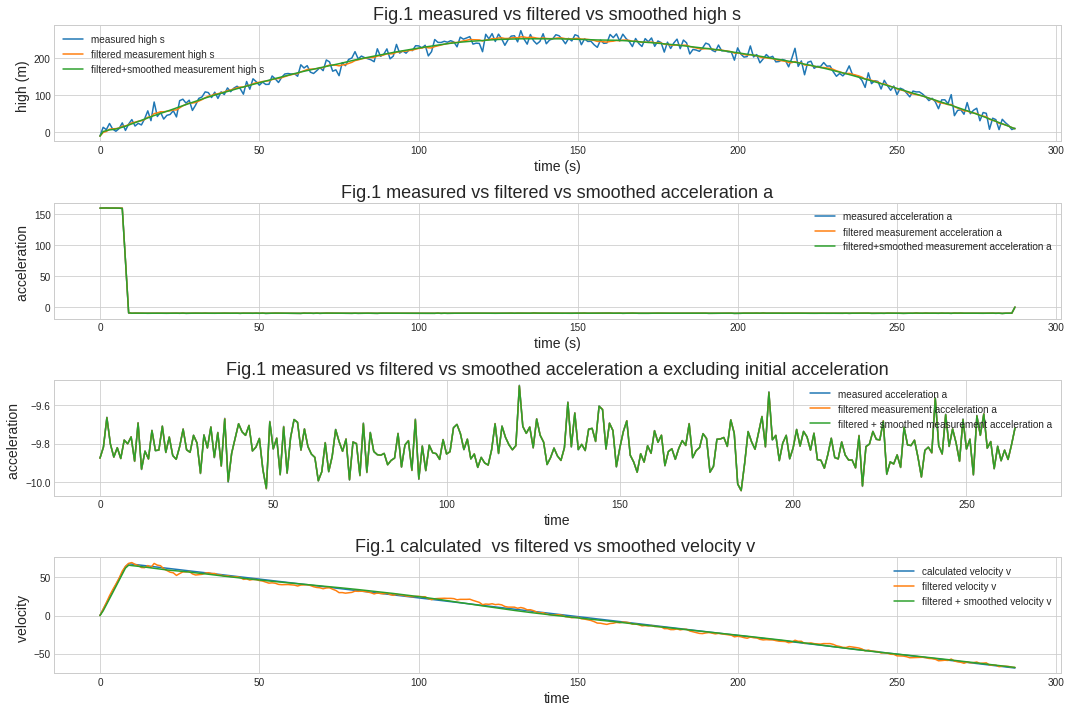

In [ ]:
plt.subplot(4,1,1)
plt.plot(X_state[:,0], label="measured high s") # plot the measurements
plt.plot(X_filter[:,0], label="filtered measurement high s") # plot the trajectory
plt.plot(X_smooth[:,0], label="filtered+smoothed measurement high s") # plot the trajectory
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('high (m) ',fontsize=14)
plt.title('Fig.1 measured vs filtered vs smoothed high s', fontsize=18)
plt.legend()
plt.subplot(4,1,2)
plt.plot(X_state[:,2], label="measured acceleration a") # plot the measurements
plt.plot(X_filter[:,2], label="filtered measurement acceleration a")
plt.plot(X_smooth[:,2], label="filtered+smoothed measurement acceleration a")
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('acceleration ',fontsize=14)
plt.title('Fig.1 measured vs filtered vs smoothed acceleration a', fontsize=18)
plt.legend()
plt.subplot(4,1,3)
plt.plot(X_state[15:280,2], label="measured acceleration a") # plot the measurements
plt.plot(X_filter[15:280,2], label="filtered measurement acceleration a")
plt.plot(X_smooth[15:280,2], label="filtered + smoothed measurement acceleration a")
plt.xlabel('time',fontsize=14)
plt.ylabel('acceleration ',fontsize=14)
plt.title('Fig.1 measured vs filtered vs smoothed acceleration a excluding initial acceleration', fontsize=18)
plt.legend()
plt.subplot(4,1,4)
plt.plot(X_state[:,1], label="calculated velocity v") # plot the measurements
plt.plot(X_filter[:,1], label="filtered velocity v") # plot the trajectory
plt.plot(X_smooth[:,1], label="filtered + smoothed velocity v") # plot the trajectory
plt.xlabel('time',fontsize=14)
plt.ylabel('velocity ',fontsize=14)
plt.title('Fig.1 calculated  vs filtered vs smoothed velocity v ', fontsize=18)
plt.tight_layout()
plt.legend()
plt.show()


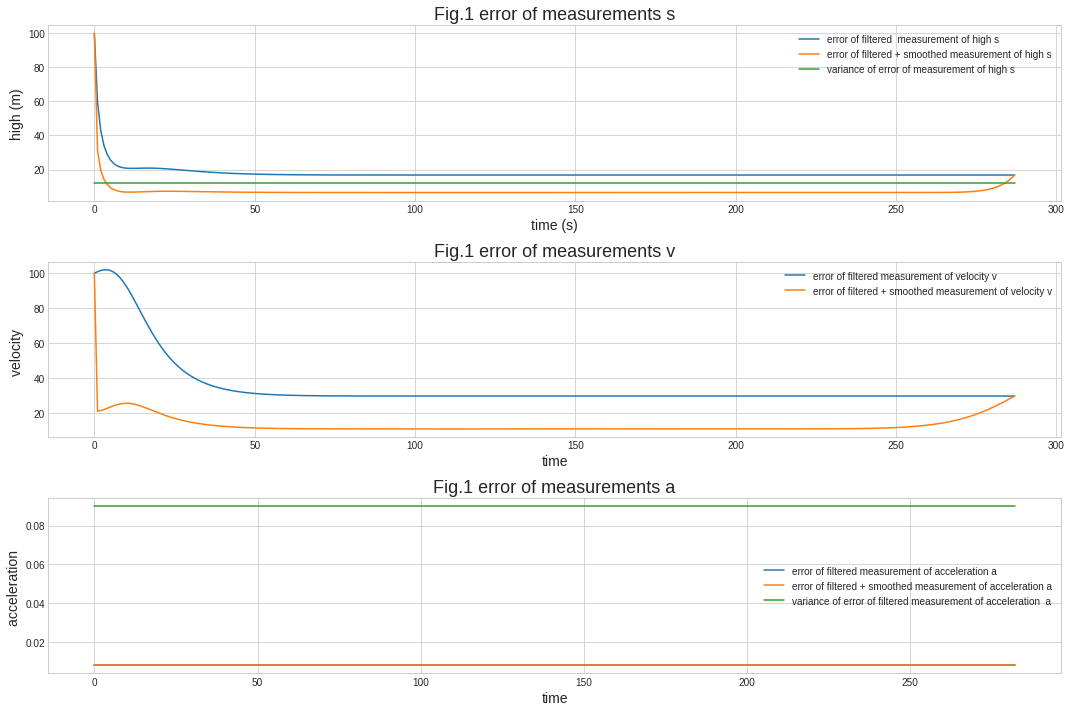

In [ ]:
plt.subplot(3,1,1)
plt.plot(P_filter[:,0,0], label="error of filtered  measurement of high s") # plot the measurements
plt.plot(P_smooth[:,0,0], label="error of filtered + smoothed measurement of high s") # plot the trajectory
plt.plot(np.ones_like(P_filter[:,0,0])*np.sqrt(sigma_s), label="variance of error of measurement of high s") # plot the measurements
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('high (m)',fontsize=14)
plt.title('Fig.1 error of measurements s', fontsize=18)
plt.legend()
plt.subplot(3,1,2)
plt.plot(P_filter[:,1,1], label="error of filtered measurement of velocity v")# plot the measurements
plt.plot(P_smooth[:,1,1], label="error of filtered + smoothed measurement of velocity v")
plt.xlabel('time',fontsize=14)
plt.ylabel('velocity ',fontsize=14)
plt.title('Fig.1 error of measurements v', fontsize=18)
plt.legend()
plt.subplot(3,1,3)
plt.plot(P_filter[5:,2,2], label="error of filtered measurement of acceleration a") # plot the measurements
plt.plot(P_filter[5:,2,2], label="error of filtered + smoothed measurement of acceleration a")
plt.plot(np.ones_like(P_filter[5:,2,2])*np.sqrt(sigma_a), label="variance of error of filtered measurement of acceleration  a")
plt.xlabel('time',fontsize=14)
plt.ylabel('acceleration ',fontsize=14)
plt.title('Fig.1 error of measurements a', fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()


Finding the high and time when the rocket reaches the apogee

In [ ]:
X_apogee=Z[:,0].max()
X_filt_apogee=X_filter[:,0].max()
X_smooth_apogee=X_smooth[:,0].max()
t_filt_apogee=time["Time"][X_filter[:,0].argmax()]
t_apogee=time["Time"][Z[:,0].argmax()]
t__smooth_apogee=time["Time"][X_smooth[:,0].argmax()]
print("using raw data"," height at apogge",X_apogee, "time of apogee",t_apogee)
print("using filtered data"," height at apogge",X_filt_apogee, "time of apogee",t_filt_apogee)
print("using filtered data"," height at apogge",X_smooth_apogee, "time of apogee",t__smooth_apogee)

using raw data  height at apogge 273.661668 time of apogee 6.622997
using filtered data  height at apogge 256.95476150098466 time of apogee 6.622997
using filtered data  height at apogge 251.8483943577489 time of apogee 6.974216


In [ ]:
def Kalman_gaps(N, Phi, X_init, Q, P,H, z,z_acc):
  """
  Inputs:
  N: size
  Phi: transition matrix
  X: State Vector
  Q: Covariance matrix
  P: Filtration error covariance matrix
  z: measurements
  m: steps
  K_steady: determine the constant value of kalman filter gain
  polar: return adicionally the dataset in polar coordinates
  Outputs:
  X: Estimation results(before m-step extrapolation)
  X_step: Estimation results(after m-step extrapolation)
  P: Filtration error covariance matrix
  K: Filter gain, weight of residual
  """
  # Initialize X
  X = X_init.copy()
  # Initialize X_step
  P_ext=P.copy()
  # Create a matrix for K
  K = np.zeros((N, X.shape[1], R.shape[1]))
  acc=False
  # Kalman filter algorithm
  for i in range(1, N):
  # Prediction(extrapolation)
    X[i] = Phi @ X[i-1] # by function (13)
    P[i] = (Phi @ P[i-1] @ Phi.T) + Q # by function (14)
    P_ext[i]=P[i]
     # by function
    # Filtration
    K[i] = P[i] @ H.T @ np.linalg.inv(H @ P[i] @ H.T + R) # by function (18)
    X[i] = X[i] + K[i] @(z[i] - H @ X[i]) # by function (16)
    P[i] = (np.identity(len(P[0])) - K[i] @ H) @ P[i]
    if not math.isnan(z_acc[i,0,0]):
      K[i] = P[i] @ H.T @ np.linalg.inv(H @ P[i] @ H.T + R_acc) # by function (18)
      X[i] = X[i] + K[i] @(z_acc[i] - H @ X[i]) # by function (16)
      P[i] = (np.identity(len(P[0])) - K[i] @ H) @ P[i] # by function (18)


  return X, P,P_ext, K

In [ ]:
Z_acc=measurements(z_acc)

sigma_s_acc=2**2#variance of measurement noise of high
sigma_a_acc=0.01**2#variance of measurement noise of acceleration
R_acc=np.eye(2,2)*[[sigma_s_acc],[sigma_a_acc]]
R=np.eye(2,2)*[[sigma_s],[sigma_a]]
X_filter_acc, P_filter_acc,P_extra_acc, K_acc=Kalman_gaps(len(Z), Phi, X_state, Q, P,H, Z,Z_acc)
X_smooth_acc,P_smooth_acc,A_acc=Kalman_backward_smoothing( X_filter_acc,P_filter_acc,P_extra_acc,Phi)

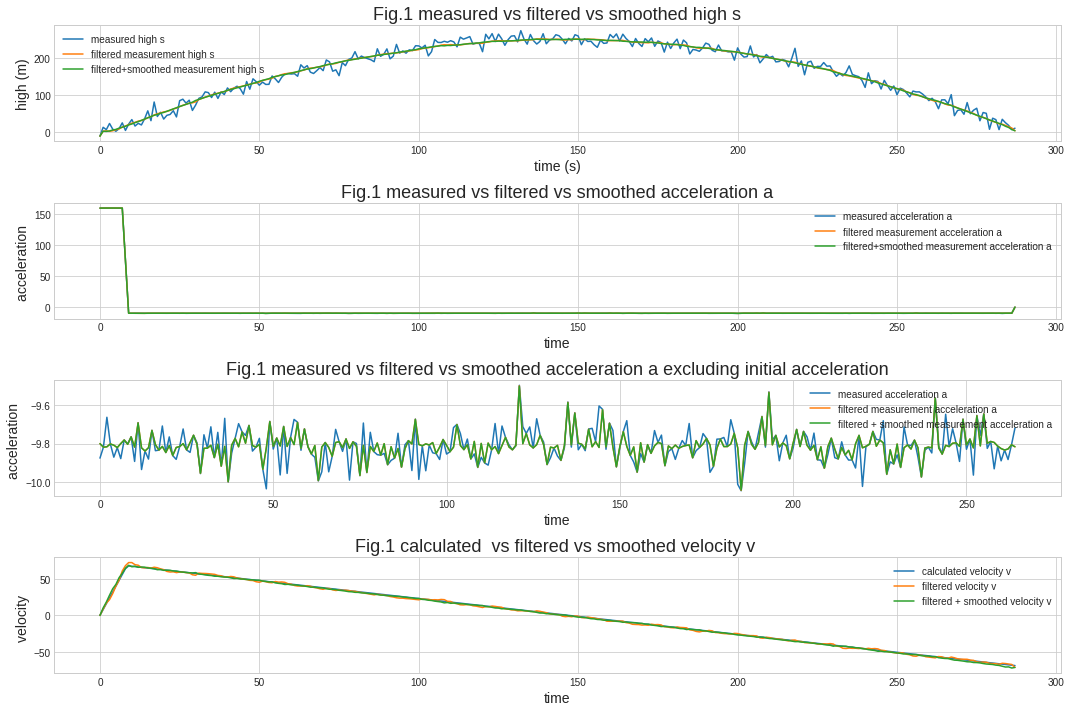

In [ ]:
plt.subplot(4,1,1)
plt.plot(X_state[:,0], label="measured high s") # plot the measurements
plt.plot(X_filter_acc[:,0], label="filtered measurement high s") # plot the trajectory
plt.plot(X_smooth_acc[:,0], label="filtered+smoothed measurement high s") # plot the trajectory
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('high (m)',fontsize=14)
plt.title('Fig.1 measured vs filtered vs smoothed high s', fontsize=18)
plt.legend()
plt.subplot(4,1,2)
plt.plot(X_state[:,2], label="measured acceleration a") # plot the measurements
plt.plot(X_filter_acc[:,2], label="filtered measurement acceleration a")
plt.plot(X_smooth_acc[:,2], label="filtered+smoothed measurement acceleration a")
plt.xlabel('time',fontsize=14)
plt.ylabel('acceleration ',fontsize=14)
plt.title('Fig.1 measured vs filtered vs smoothed acceleration a', fontsize=18)
plt.legend()
plt.subplot(4,1,3)
plt.plot(X_state[15:280,2], label="measured acceleration a") # plot the measurements
plt.plot(X_filter_acc[15:280,2], label="filtered measurement acceleration a")
plt.plot(X_smooth_acc[15:280,2], label="filtered + smoothed measurement acceleration a")
plt.xlabel('time',fontsize=14)
plt.ylabel('acceleration ',fontsize=14)
plt.title('Fig.1 measured vs filtered vs smoothed acceleration a excluding initial acceleration', fontsize=18)
plt.legend()
plt.subplot(4,1,4)
plt.plot(X_state[:,1], label="calculated velocity v") # plot the measurements
plt.plot(X_filter_acc[:,1], label="filtered velocity v") # plot the trajectory
plt.plot(X_smooth_acc[:,1], label="filtered + smoothed velocity v") # plot the trajectory
plt.xlabel('time',fontsize=14)
plt.ylabel('velocity ',fontsize=14)
plt.title('Fig.1 calculated  vs filtered vs smoothed velocity v ', fontsize=18)
plt.tight_layout()
plt.legend()
plt.show()

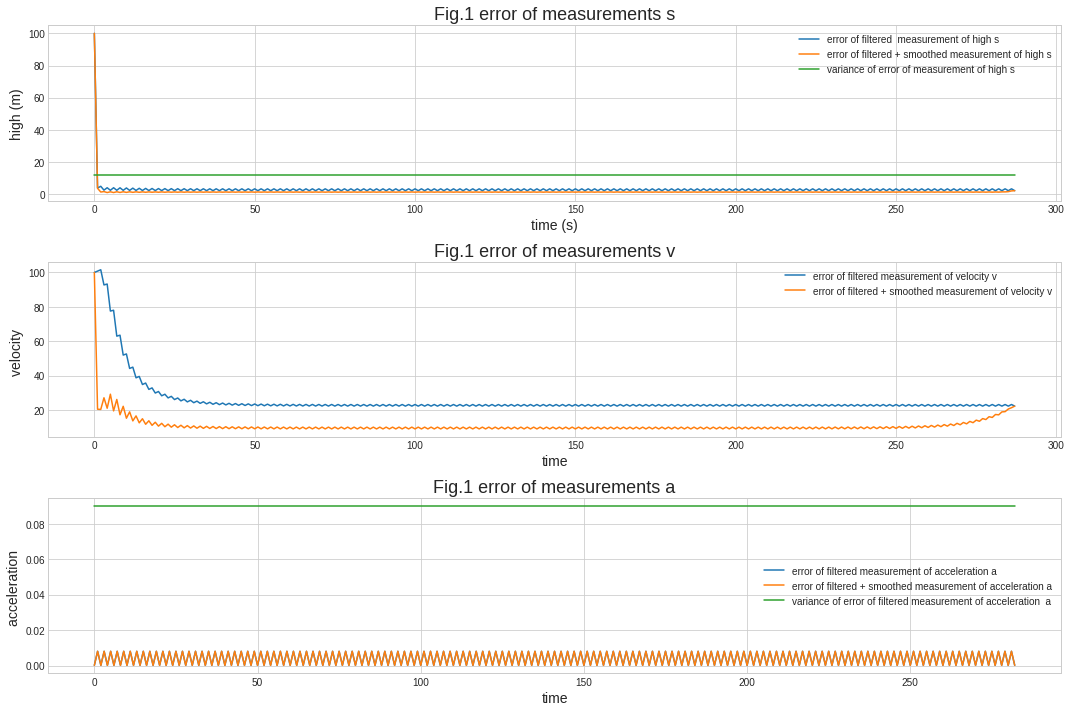

In [ ]:
plt.subplot(3,1,1)
plt.plot(P_filter_acc[:,0,0], label="error of filtered  measurement of high s") # plot the measurements
plt.plot(P_smooth_acc[:,0,0], label="error of filtered + smoothed measurement of high s") # plot the trajectory
plt.plot(np.ones_like(P_filter[:,0,0])*np.sqrt(sigma_s), label="variance of error of measurement of high s") # plot the measurements
plt.xlabel('time (s)',fontsize=14)
plt.ylabel('high (m)',fontsize=14)
plt.title('Fig.1 error of measurements s', fontsize=18)
plt.legend()
plt.subplot(3,1,2)
plt.plot(P_filter_acc[:,1,1], label="error of filtered measurement of velocity v")# plot the measurements
plt.plot(P_smooth_acc[:,1,1], label="error of filtered + smoothed measurement of velocity v")
plt.xlabel('time',fontsize=14)
plt.ylabel('velocity ',fontsize=14)
plt.title('Fig.1 error of measurements v', fontsize=18)
plt.legend()
plt.subplot(3,1,3)
plt.plot(P_filter_acc[5:,2,2], label="error of filtered measurement of acceleration a") # plot the measurements
plt.plot(P_filter_acc[5:,2,2], label="error of filtered + smoothed measurement of acceleration a")
plt.plot(np.ones_like(P_filter[5:,2,2])*np.sqrt(sigma_a), label="variance of error of filtered measurement of acceleration  a")
plt.xlabel('time',fontsize=14)
plt.ylabel('acceleration ',fontsize=14)
plt.title('Fig.1 error of measurements a', fontsize=18)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
X_apogee_acc=Z_acc[:,0].max()
X_filt_apogee_acc=X_filter_acc[:,0].max()
X_smooth_apogee_acc=X_smooth_acc[:,0].max()
t_filt_apogee_acc=time["Time"][X_filter_acc[:,0].argmax()]
t_apogee_acc=time["Time"][Z_acc[:,0].argmax()]
t__smooth_apogee_acc=time["Time"][X_smooth_acc[:,0].argmax()]
print("using raw data"," height at apogee",X_apogee_acc, "time of apogee",t_apogee_acc)
print("using filtered data low and high accuracy"," height at apogee",X_filt_apogee_acc, "time of apogee",t_filt_apogee_acc)
print("using filtered data low and high accuracy"," height at apogee",X_smooth_apogee_acc, "time of apogee",t__smooth_apogee_acc)

using raw data  height at apogee nan time of apogee 0.0
using filtered data low and high accuracy  height at apogee 251.59259315378245 time of apogee 6.924042
using filtered data low and high accuracy  height at apogee 250.84771239234018 time of apogee 7.425784


In [ ]:
!jupyter nbconvert --to html /content/Final_project.ipynb

[NbConvertApp] Converting notebook /content/Final_project.ipynb to html
[NbConvertApp] Writing 1259487 bytes to /content/Final_project.html
